**Introduction to Python, Numpy and Scipy**

Imports

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from numpy.linalg import matrix_rank
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
import math
from os import path
import urllib
import zipfile
import sys
import string
import time
from copy import copy

1) From a word containing all the alphabet letters, generate with a string slicing the string cfilorux.
Do the same for the string vxz.

In [2]:
string_1 = string.ascii_lowercase[:26]
string_2 = string.ascii_lowercase[2:26:3]
string_3 = string.ascii_lowercase[21:26:2]
print (f'This is one option to get from {string_1} to {string_2} and {string_3}')

This is one option to get from abcdefghijklmnopqrstuvwxyz to cfilorux and vxz


2) Display the number π with 9 digits.

In [3]:
pi = np.pi
rounded = round(pi,9)
print (f'The number π with 9 digits is {rounded}')

The number π with 9 digits is 3.141592654


3) Count the number of occurrences of each character in the string s="HelLo WorLd!!". Output a
dictionary that for each character associate the number of occurrences.

In [4]:
string = "HelLo WorLd!!"
dic = {i : string.count(i) for i in set(string)}
print (f'The count of all characters in {string} is :\n' + str(dic)) 

The count of all characters in HelLo WorLd!! is :
{'e': 1, 'd': 1, 'H': 1, ' ': 1, 'l': 1, '!': 2, 'o': 2, 'W': 1, 'r': 1, 'L': 2}


4) Write a function performing the Cesar code : each character is replaced by the third next one (i.e.
a by d, b by e, z by c). Test it.

In [5]:
KEY = 3
def ceasar_cipher(string):
    return ''.join([cipher(letter) for letter in string])
def cipher(letter):
    code = ord(letter) + KEY
    if code <= 122:
        return chr(code)
    else:
        return chr(96 + code % 122)
expectedResults = { 'abcd': 'defg', 'mathis': 'pdwklv', 'louis': 'orxlv' }
for string, expected in expectedResults.items():
    print('String: {} - Expected: {} - Actual: {}\n'.format(string, expected, ceasar_cipher(string)))

String: abcd - Expected: defg - Actual: defg

String: mathis - Expected: pdwklv - Actual: pdwklv

String: louis - Expected: orxlv - Actual: orxlv



Further work might be needed to cover edge cases such as special characters

5) Compute this product. Use for instance time to determine a fast version. Propose a version without loop, using Numpy

In [6]:
N = 1000
def product_loop():
    product = 2
    for k in range(1, N + 1):
        product *= ((4*k**2)/(4*k**2 - 1))
    return product
def product_np():
    x = np.arange(1,N + 1)
    f = (4*x**2)/(4*x**2-1)
    res = 2*np.prod(f)
    return(res)
print('Computation time using a loop:')
%timeit product_loop()
print('Computation time using numpy:')
%timeit result =  product_np()

Computation time using a loop:
568 µs ± 46.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Computation time using numpy:
14.8 µs ± 680 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


6) Without using for / while loops, create a random matrix with coefficients taken uniformly (and independently) in  Substract to each even column of M, twice the value of the following (uneven) column Replace the negative values by 0 using a binary mask.

In [7]:
# Creating a random matrix in Mp,r(5,6) with coefficients taken uniformly (and independently) in [-1, 1]
ROW, COL = 5, 6
M = np.random.uniform(low=-1, high=1, size=(ROW, COL))
# Substract to each even column of M, twice the value of the following (uneven) column 
N = copy(M) # Copy M to avoid reference
N[:, 1::2] = 0 # Replace odd columns by zero
N = np.roll(N, -1, axis=1) # Shift even and odd columns
N = 2 * N
M = M - N
# Replace the negative values by 0 using a binary mask
M[M < 0] = 0
print (f'The final matrix is :\n' + str(M))

The final matrix is :
[[0.         1.46723938 0.         0.         0.83788092 0.87896932]
 [0.39916072 1.4196064  0.         0.         0.86317628 0.05759273]
 [0.81510031 0.         0.36480285 0.         0.59853266 0.        ]
 [0.         2.51138957 0.         1.43177366 0.         0.6106547 ]
 [0.         0.         0.         0.52952146 0.09871166 0.88891344]]


7) Create a random matrix M P 5 ˆ 20 with coefficients taken uniformly (and independently) in
r´1, 1s. Test whether G “ MJM is symmetric (semi-) definite positive, and that its eigenvalues are
positive. What is the rank of G ? Compute the Euclidean norm of G. Compute the `1 norm of the
columns of G.

In [8]:
ROW, COL = 5, 20
M = np.random.uniform(low=-1, high=1, size=(ROW, COL))
MT = M.T
G = np.dot(MT, M)
def is_sym_pos_sem_def(x):
    if np.allclose(G, G.T):
        if np.all(np.linalg.eigvals(x) > 0):
                  return "The matrix is symmetric positive definite"
        elif np.all(np.linalg.eigvals(x) >= 0):
                  return "The matrix symmetric positive semi-definite"
        else:
            return "The matrix is symmetric but not positive semi-definite nor definite"
    else:
        return "The matrix is not symmetric"
print(is_sym_pos_sem_def(G))
rank = matrix_rank(G) 
print (f'The rank of G is {rank}')
norm = LA.norm(G)
print (f'The Euclidian norm of G is {norm}')
for i in range(0, np.shape(G)[1]):
    c = G[:,i] 
    l1 = LA.norm(c, ord=1)  
    print(f'The L1 norm of column {i+1} is {round(l1, 2)}')

The matrix is symmetric but not positive semi-definite nor definite
The rank of G is 5
The Euclidian norm of G is 20.112654981756915
The L1 norm of column 1 is 16.81
The L1 norm of column 2 is 21.72
The L1 norm of column 3 is 11.85
The L1 norm of column 4 is 19.43
The L1 norm of column 5 is 20.76
The L1 norm of column 6 is 11.07
The L1 norm of column 7 is 15.66
The L1 norm of column 8 is 19.53
The L1 norm of column 9 is 20.37
The L1 norm of column 10 is 15.14
The L1 norm of column 11 is 18.15
The L1 norm of column 12 is 18.15
The L1 norm of column 13 is 13.75
The L1 norm of column 14 is 11.55
The L1 norm of column 15 is 13.77
The L1 norm of column 16 is 15.97
The L1 norm of column 17 is 12.67
The L1 norm of column 18 is 10.09
The L1 norm of column 19 is 14.42
The L1 norm of column 20 is 20.84


8) Use a list comprehension to construct a list with all squares from 1 to 121. Do the same using only
numpy

In [9]:
N = 121
max = math.floor(math.sqrt(N)) + 1
squares = [i**2 for i in range(1, max)] 
squares_np = np.square(range(1, max))
print(squares, squares_np, squares == squares_np)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121] [  1   4   9  16  25  36  49  64  81 100 121] [ True  True  True  True  True  True  True  True  True  True  True]


**Introduction to Pandas, Matplotlib, etc**

9) First, execute the following commands to download the data (this snippet is also in
download_hpc.py on the Moodle if copy pasting fails) :

In [10]:
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename
if not(path.isfile('zipfilename')):
    urllib.request.urlretrieve(Location, zipfilename)
zip = zipfile.ZipFile(zipfilename)
zip.extractall()
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
na_values=na_values, usecols=fields)

In [11]:
df.shape

(200000, 3)

In [12]:
df

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666
...,...,...,...
199995,4/5/2007,14:39:00,0.348
199996,4/5/2007,14:40:00,0.344
199997,4/5/2007,14:41:00,0.342
199998,4/5/2007,14:42:00,0.340


10) Detect and count the number of line with missing values

In [13]:
df.isna()

,Date,Time,Global_active_power
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
199995,False,False,False
199996,False,False,False
199997,False,False,False
199998,False,False,False


In [14]:
df[df.isna().any(axis=1)] 

,Date,Time,Global_active_power
6839,21/12/2006,11:23:00,NaN
6840,21/12/2006,11:24:00,NaN
19724,30/12/2006,10:08:00,NaN
19725,30/12/2006,10:09:00,NaN
41832,14/1/2007,18:36:00,NaN
...,...,...,...
194215,30/4/2007,14:19:00,NaN
194216,30/4/2007,14:20:00,NaN
194217,30/4/2007,14:21:00,NaN
194218,30/4/2007,14:22:00,NaN


In [15]:
df.isna().sum()

Date                      0
Time                      0
Global_active_power    3732
dtype: int64

We have to be aware of the limitations of .isna which only surfaces NaN or None values. 
In a real setting we would devise strategies to identify other types of missing values.

11) Erase all such lines.

In [16]:
df = df.dropna() # drop rows with at least one NaN value

In [17]:
df.shape

(196268, 3)

In [18]:
df.isna().sum()

Date                   0
Time                   0
Global_active_power    0
dtype: int64

12) Use to_datetime and set_index to create a Time Series (beware of the international dates format that is different from the French standard).

In [19]:
# Concatenate Date and Time columns into a new Datetime column
df['Datetime'] = df['Date'] + ' ' + df['Time']

# Convert Datetime to datetime format
df['Datetime'] =  pd.to_datetime(df['Datetime'], dayfirst=True)
# print(df.dtypes) Datetime is of datetime64[ns] type

# Set the converted column to index
df = df.set_index('Datetime')
df = df.drop(df.columns[[0, 1]], axis=1)
print(df.head())
print(df.shape)

                     Global_active_power
Datetime                                
2006-12-16 17:24:00                4.216
2006-12-16 17:25:00                5.360
2006-12-16 17:26:00                5.374
2006-12-16 17:27:00                5.388
2006-12-16 17:28:00                3.666
(196268, 1)


13) Display the graphic of daily averages, between January 1 2007 and April 30 2007. Propose an
explanation for the consumption behavior between February and early April. On top of matplotlib
you could use the seaborn package for nicer display.

                     Global_active_power
Datetime                                
2007-01-01 00:00:00                2.580
2007-01-01 00:01:00                2.552
2007-01-01 00:02:00                2.550
2007-01-01 00:03:00                2.550
2007-01-01 00:04:00                2.554
...                                  ...
2007-04-30 23:55:00                0.362
2007-04-30 23:56:00                0.362
2007-04-30 23:57:00                0.362
2007-04-30 23:58:00                0.358
2007-04-30 23:59:00                0.356

[169072 rows x 1 columns]
(169072, 1)
            Global_active_power
Datetime                       
2007-01-01             1.909031
2007-01-02             0.881414
2007-01-03             0.704204
2007-01-04             2.263481
2007-01-05             1.884281
...                         ...
2007-04-26             0.885740
2007-04-27             0.759953
2007-04-28             1.082762
2007-04-29                  NaN
2007-04-30             0.730594

[120 rows x

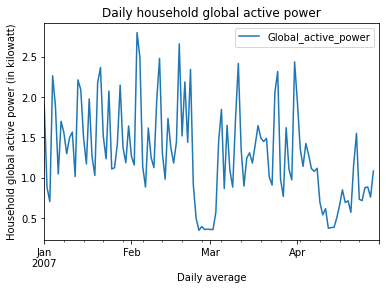

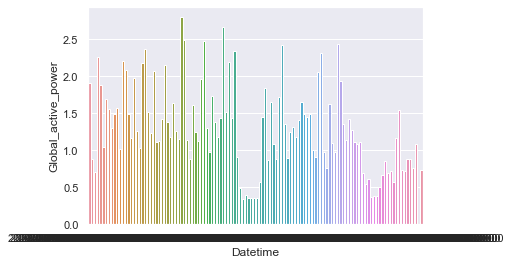

In [20]:
# Create a new dataframe between January 1 2007 and April 30 2007
df2 = df.loc['2007-01-01':'2007-04-30']  
print(df2)
print(df2.shape) # we only lose 15 days

# Get daily averages
df3 = df2.resample('D').mean()
print(df3) # We get NaNs (see cell below)
print(df3.shape) # We get 120 rows, i.e. 4x30 days

# Display it using matplotlib 
df3.plot()
plt.title('Daily household global active power')
plt.xlabel("Daily average")
plt.ylabel("Household global active power (in kilowatt)")
plt.show()

# Display it using Seaborn
sns.set()
sns.barplot(x=df3.index, y="Global_active_power", data=df3)
# x-axis not showing up

In [21]:
# it seems that we have no data for Apr 29th
df3.isna().sum()
df3[df3.isna().any(axis=1)] 
df2.loc['2007-04-29']  

,Global_active_power
Datetime,


In [22]:
# Continuing the analysis to understand the root cause of the gap
df3.loc['2007-02-15':'2007-03-5'] 


,Global_active_power
Datetime,
2007-02-15,1.378712
2007-02-16,1.182311
2007-02-17,1.442300
2007-02-18,2.659557
2007-02-19,1.518482
2007-02-20,2.187450
2007-02-21,1.439496
2007-02-22,2.343170
2007-02-23,0.912139


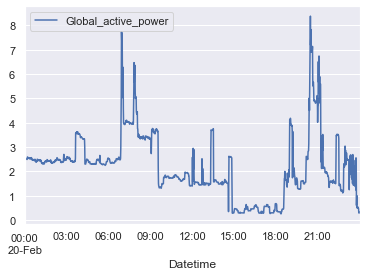

In [23]:
df2.loc['2007-02-20'].plot()

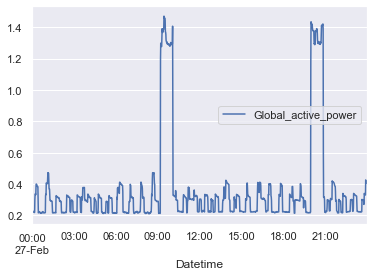

In [24]:
df2.loc['2007-02-27'].plot()

### Explanation for the consumption behavior between February and early April
We observe that the active power consumption tends to fluctuate around an average of 1.5, remains between 1 and 2 with a floor consumption of 0.2. <br>
Daily variability could be explained by intraday behavior differences, as people tend to consume more power when they wake up and when they come back home at night. Weekly changes could be explained by the same reasons, as people tend to consume more power during weekends. To back this up, further analysis is required (time series decomposition). <br>
We can notice two outliers below average, at the end of February as well as at the end of April. 
At the end of February, consumption is much lower (between 0.2 and 0.4). Peaks every 10-hour periods throughout the day are noticeable. It could be due to power outage or a change of consumption behavior caused by holiday season.

14) Load the dataset with pandas, and keep only the DATE and TG columns. Divide by 10 the TG column to get Celsius temperature. Treat missing values as NaNs

In [25]:
orly = pd.read_csv('TG_STAID011249.txt', sep=",")
orly 

# df = pd.read_csv('some_data.csv', usecols = ['DATE','TG']) throws an error

,STAID,SOUID,DATE,TG,Q_TG
0,11249,71642,19210301,50,0
1,11249,71642,19210302,46,0
2,11249,71642,19210303,46,0
3,11249,71642,19210304,31,0
4,11249,71642,19210305,95,0
...,...,...,...,...,...
34878,11249,907149,20160827,266,0
34879,11249,907149,20160828,255,0
34880,11249,907149,20160829,206,0
34881,11249,907149,20160830,204,0


In [26]:
orly.columns # We got an error because the colnames have whitespace

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [27]:
old_cols = list(orly.columns)
new_cols = [i.strip() for i in old_cols] 
new_cols

['STAID', 'SOUID', 'DATE', 'TG', 'Q_TG']

In [28]:
orly.columns = new_cols
orly.columns

Index(['STAID', 'SOUID', 'DATE', 'TG', 'Q_TG'], dtype='object')

In [29]:
orly = orly[['DATE','TG']]
orly

,DATE,TG
0,19210301,50
1,19210302,46
2,19210303,46
3,19210304,31
4,19210305,95
...,...,...
34878,20160827,266
34879,20160828,255
34880,20160829,206
34881,20160830,204


In [30]:
orly['TG'] = orly['TG'].div(10)
orly

,DATE,TG
0,19210301,5.0
1,19210302,4.6
2,19210303,4.6
3,19210304,3.1
4,19210305,9.5
...,...,...
34878,20160827,26.6
34879,20160828,25.5
34880,20160829,20.6
34881,20160830,20.4


In [31]:
orly.isna().sum()

DATE    0
TG      0
dtype: int64

In [32]:
orly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34883 entries, 0 to 34882
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    34883 non-null  int64  
 1   TG      34883 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 545.2 KB


In [33]:
orly.describe()

,DATE,TG
count,3.488300e+04,34883.000000
mean,1.968482e+07,-231.823358
std,2.757153e+05,432.177821
min,1.921030e+07,-999.900000
25%,1.945011e+07,-2.800000
50%,1.968113e+07,8.200000
75%,1.992102e+07,15.000000
max,2.016083e+07,31.600000


In [34]:
orly.TG.mode() # temperatures in celcius cannot be -999.9

0   -999.9
dtype: float64

In [35]:
orly.loc[orly['TG'] < -999] = np.nan

In [36]:
orly.isna().sum()

DATE    8387
TG      8387
dtype: int64

15) Create a pandas Time Series with the daily temperatures between January 1 2007 and April 3 2007. Display on the same graph the temperature and the Global_active_power Time Series.

In [37]:
orly['DATE'] = pd.to_datetime(orly['DATE'], format='%Y%m%d')
orly = orly.set_index('DATE')
orly

,TG
DATE,
1921-03-01,5.0
1921-03-02,4.6
1921-03-03,4.6
1921-03-04,3.1
1921-03-05,9.5
...,...
2016-08-27,26.6
2016-08-28,25.5
2016-08-29,20.6


Text(0, 0.5, 'Temperature (°C)')

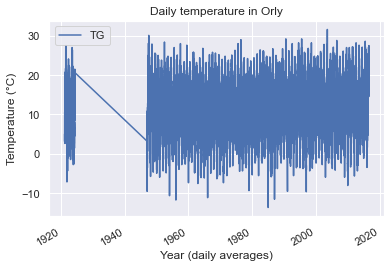

In [38]:
orly.plot()
plt.title('Daily temperature in Orly')
plt.xlabel('Year (daily averages)')
plt.ylabel('Temperature (°C)')

Text(0, 0.5, 'Temperature (°C)')

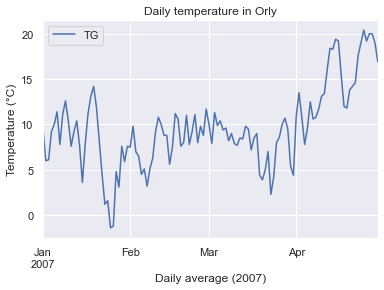

In [39]:
orly2 = orly.loc['2007-01-01':'2007-04-30'] 
orly2.plot()
plt.title('Daily temperature in Orly')
plt.xlabel('Daily average (2007)')
plt.ylabel('Temperature (°C)')

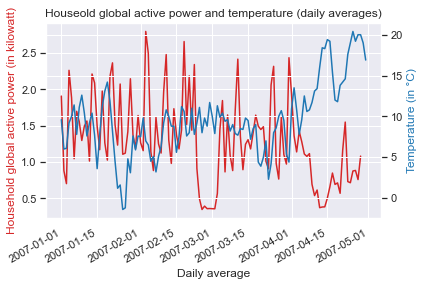

In [40]:
t = orly2.index
data1 = df3['Global_active_power']
data2 = orly2['TG']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Daily average')
ax1.set_ylabel('Household global active power (in kilowatt)', color=color)
ax1.plot(t, data1, color=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Temperature (in °C)', color=color) 
ax2.plot(t, data2, color=color)

fig.autofmt_xdate()

plt.title("Houseold global active power and temperature (daily averages)")
plt.show()

We observe that the consumption decrease coincides with a temperature peak. This leads us to revise our initial hypothesis of a supply shortage. We would need further analysis to confirm this new hypothesis, as the consumption decrease still seams brutal (e.g. similar patterns in the past?)